In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
 train_data = pd.read_excel (r"C:\Users\DELL\Downloads\Flight_Price_resources\Data_Train.xlsx")

In [3]:
train_data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


In [10]:
data = train_data.copy()

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
def change_into_Datetime(col):
    data[col] =pd.to_datetime(data[col])

In [15]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [16]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
for setofcol in ['Dep_Time' ,'Arrival_Time' ,'Date_of_Journey']:
    change_into_Datetime (setofcol)

In [18]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [19]:
data["Journey_day"] = data[ 'Date_of_Journey'].dt.day.astype(np.int64)

In [20]:
data["Journey_month"] = data[ 'Date_of_Journey'].dt.month.astype(np.int64)

In [21]:
data["Journey_year"] = data[ 'Date_of_Journey'].dt.year.astype(np.int64)

In [22]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-13 05:50:00,2025-04-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-13 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [23]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-13 05:50:00,2025-04-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-13 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [24]:
def extract_hour_min(df ,col):
    df[col+"_hour"]= df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    return df.head(3)

In [25]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [26]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-13 05:50:00,2025-04-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-13 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25


In [27]:
extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-13 05:50:00,2025-04-13 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-13 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25,9,25


In [28]:
cols_to_drop = [ 'Arrival_Time' , "Dep_Time"]
data.drop(cols_to_drop , axis=1 , inplace = True )

In [29]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25


In [30]:
data.shape

(10682, 16)

In [31]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute'],
      dtype='object')

In [32]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
   
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late night"
    



<Axes: xlabel='Dep_Time_hour'>

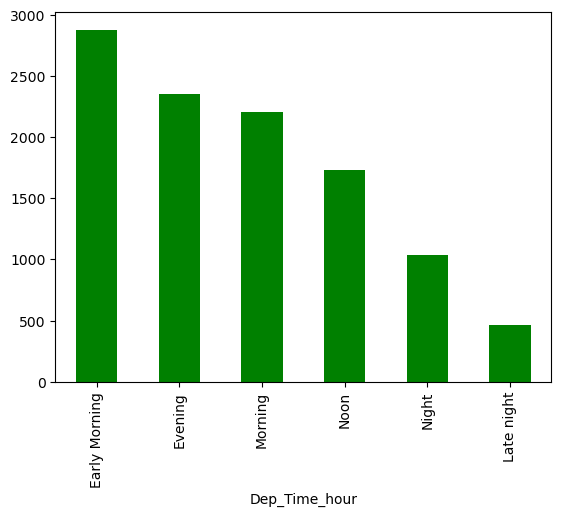

In [33]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" ,color="g")

In [34]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [35]:
   #!pip install chart_studio
   #already install
   


In [36]:
# Import plotly and related libraries
import plotly
import cufflinks as cf
from plotly.offline import (
    plot,
    iplot,
    init_notebook_mode,
    download_plotlyjs
)

def setup_plotly_notebook_mode() -> None:
    """
    Set up Plotly for use in Jupyter notebooks.
    
    This function initializes Plotly in notebook mode and configures
    cufflinks to work offline, enabling interactive visualizations
    without requiring an internet connection.
    """
    # Initialize Plotly in notebook mode
    init_notebook_mode(connected=True)
    
    # Configure cufflinks to work in offline mode
    cf.go_offline()

# Set up Plotly for notebook use
setup_plotly_notebook_mode()

<Axes: xlabel='Dep_Time_hour'>

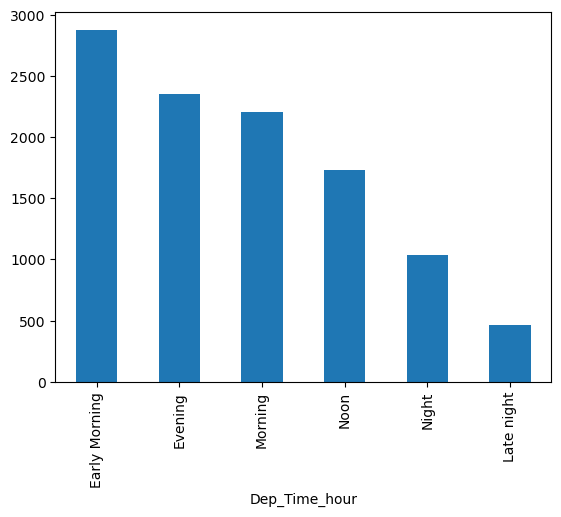

In [37]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar")

In [38]:
def preprocess_duration(X):
    # Check if hours ('h') is missing from the duration string
    if 'h'  not in X:
        # If hours is missing, add '0h' at the beginning
        X = '0h' + ' ' + X
    # Check if minutes ('m') is missing from the duration string
    elif 'm' not in X:
        # If minutes is missing, add '0m' at the end
        X = X + ' ' +'0m'
        
        # Return the preprocessed duration string
    return X

In [39]:
data ['Duration'].apply(preprocess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [40]:
data ['Duration']=data ['Duration'].apply(preprocess_duration)

In [41]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25


In [42]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [43]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [44]:
data['Duration'][0]

'2h 50m'

In [45]:
'2h 50m' .split(' ')

['2h', '50m']

In [46]:
'2h 50m'.split(' ')[0]

'2h'

In [47]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [48]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [49]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [50]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [51]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [52]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [53]:
data['Duration_hour'] = data['Duration'].fillna('0').apply(lambda x: int(x.split(' ')[0][0:-1]) if ' ' in x else 0)

In [54]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7


In [55]:
data['Duration_min'] = data['Duration'].fillna('0').apply(lambda x: int(x.split(' ')[1][0:-1]) if ' ' in x else 0)

In [56]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25


In [57]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [58]:
2*60

120

In [59]:
'2*60'

'2*60'

In [60]:
eval('2*60')

120

In [61]:
data['Duration_total_mins'] = data ['Duration'].str.replace('h' ,"*60").str.replace(' ' ,'+').str.replace('m' , "*1").apply(eval)

In [62]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_min', 'Duration_total_mins'],
      dtype='object')

In [63]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0,1140


<Axes: xlabel='Duration_total_mins', ylabel='Price'>

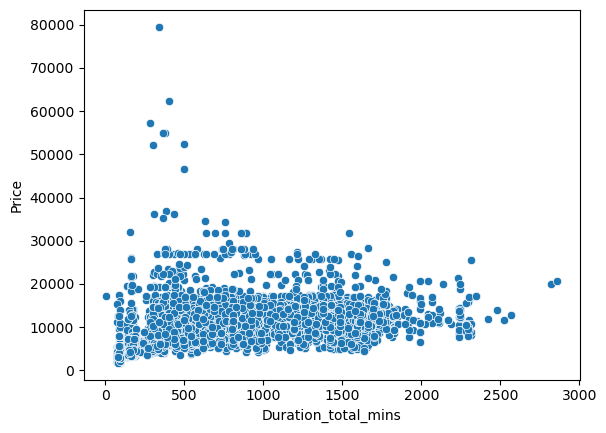

In [64]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data= data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

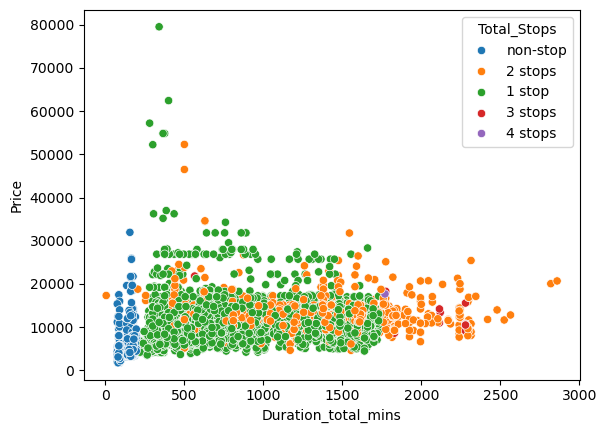

In [65]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops" ,data= data)


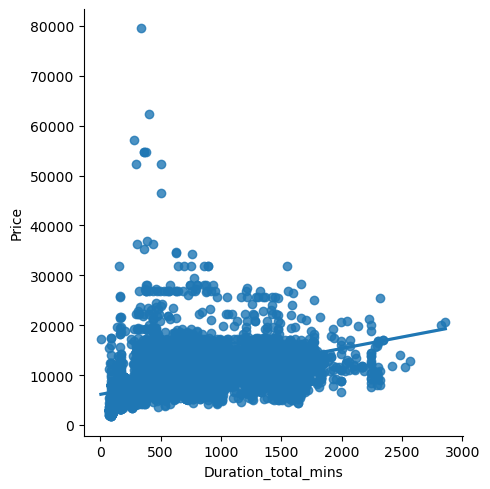

In [66]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data= data)

In [67]:
data['Airline'] =='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [68]:
data[data['Airline'] =='Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Duration_total_mins
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,10,25,18,55,15,30,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,5,5,8,0,21,5,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,10,25,8,55,25,30,1530
13,Jet Airways,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,5,2019,9,20,21,10,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-05-09,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,5,2019,19,0,11,40,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,19,0,23,5,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,4,25,13,25,15,0,900
10674,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,3,2019,21,20,20,35,24,45,1485


In [69]:
data[data['Airline'] =='Jet Airways'].groupby('Route').count()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Duration_total_mins
Route,,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [70]:
data[data['Airline'] =='Jet Airways'].groupby('Route').size()#पहले पूरे data से सिर्फ उन rows को चुना जा रहा है जहाँ 'Airline' कॉलम की वैल्यू 'Jet Airways' है।

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [71]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_min', 'Duration_total_mins'],
      dtype='object')

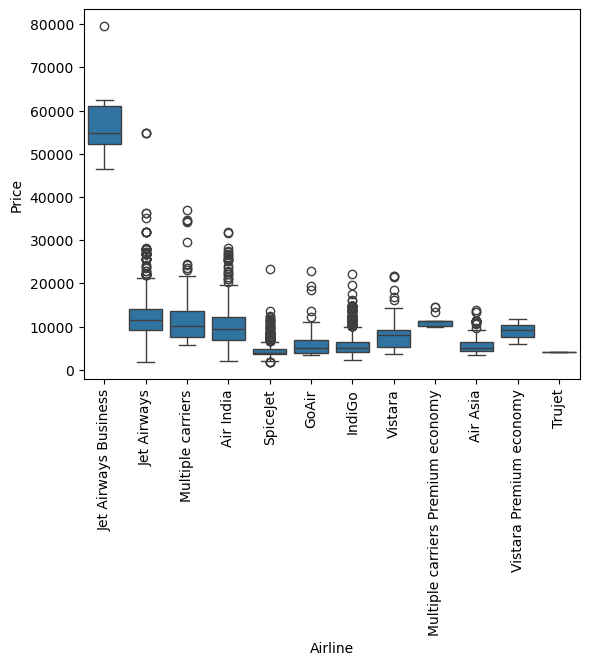

In [72]:
sns.boxplot(y='Price' , x ='Airline', data=data.sort_values('Price' ,ascending=False))
plt.xticks (rotation="vertical")
plt.show()             

In [73]:
[col for col in data.columns if data[col].dtype=="object"]

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [74]:
[col for col in data.columns if data[col].dtype!="object"]

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Duration_hour',
 'Duration_min',
 'Duration_total_mins']

In [75]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]

In [76]:
 num_col=[col for col in data.columns if data[col].dtype!="object"]

In [77]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [78]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [79]:
data['Source'].apply(lambda X:1 if X =='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [80]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category]=data['Source'].apply(lambda X:1 if X == sub_category else 0)

In [81]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [82]:
data['Airline'].unique

<bound method Series.unique of 0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object>

In [83]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [84]:
airlines =data.groupby(['Airline'])['Price'].mean().sort_values().index

In [85]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [86]:
dict_airlines ={key:index for index ,key in enumerate(airlines ,0)}

In [87]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [88]:
data['Airline']=data['Airline'].map(dict_airlines)

In [89]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [90]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [91]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [92]:
data['Destination'].replace ('New Delhi' ,'Delhi' ,inplace =True)

In [93]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [94]:
dest =data.groupby(['Destination'])['Price'].mean().sort_values().index

In [95]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [96]:
dict_dest ={key:index for index ,key in enumerate(dest ,0)}

In [97]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [98]:
data['Destination'] =data['Destination'].map(dict_dest)

In [99]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [100]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [101]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [102]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [103]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [104]:
data['Total_Stops'].map(stop)

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [105]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [106]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [107]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [108]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_min', 'Duration_total_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [109]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [110]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [111]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_min', 'Duration_total_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [112]:
data.drop(columns=['Date_of_Journey' ,'Additional_Info' ,'Duration_total_mins','Source',],axis=1 ,inplace=True)

In [113]:
data['Journey_day']

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Journey_day, Length: 10682, dtype: int64

In [114]:
data['Journey_year'].unique()

array([2019], dtype=int64)

In [115]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_min', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [116]:
data.head(3)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,2019,1,10,22,20,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,2019,13,15,5,50,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,2019,4,25,9,25,19,0,0,0,1,0,0


In [117]:
data.drop(columns=['Route'] , axis=1 ,inplace=True)

In [118]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,2019,1,10,22,20,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,2019,13,15,5,50,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,2019,4,25,9,25,19,0,0,0,1,0,0


In [119]:
data.drop(columns=['Duration'] ,axis=1 ,inplace=True)

In [120]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,2019,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,2019,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,2019,4,25,9,25,19,0,0,0,1,0,0


In [121]:
def plot(df,col):
    fig, (ax1 ,ax2 ,ax3) = plt.subplots(3,1)

    sns.distplot(df[col] ,ax=ax1)
    sns.boxplot(df[col] ,ax=ax2)
    sns.distplot(df[col] ,ax=ax3 ,kde=False)

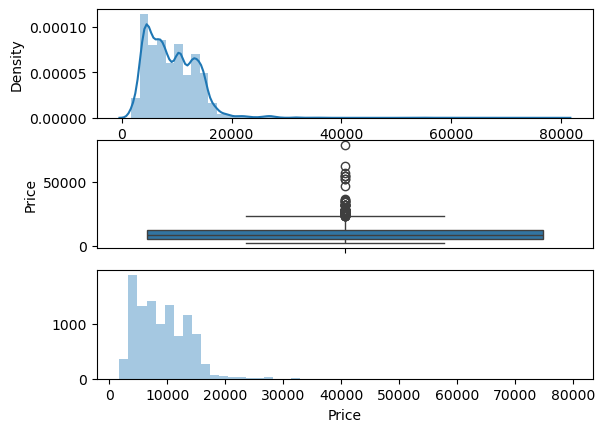

In [122]:
plot(data , 'Price')

In [123]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3-q1 

maximum=q3 + 1.5*iqr
minimum=q1 - 1.5*iqr

In [124]:
print(maximum)

23017.0


In [125]:
print(minimum)

-5367.0


In [126]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [127]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [128]:
data['Price' ] =np.where(data['Price' ]>=35000 ,data['Price'].median() ,data['Price'])

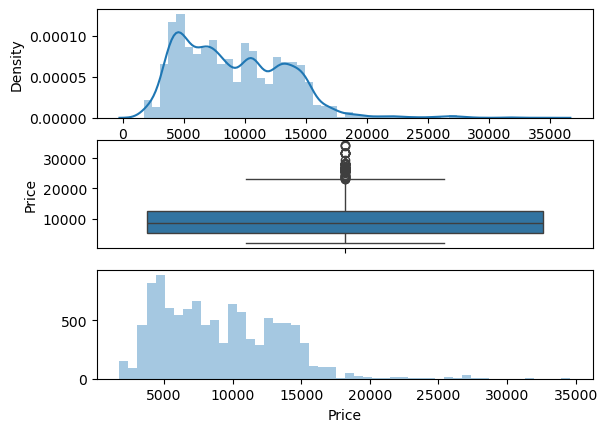

In [129]:
plot(data, 'Price' )

In [130]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hour', 'Duration_min', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [131]:
data.drop(columns=['Journey_year',],axis=1 ,inplace=True)

In [132]:
 data.drop(['Price'] ,axis=1)

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,9,6,4,25,9,25,19,0,0,0,1,0,0
3,3,3,1,12,5,23,30,18,5,5,25,0,1,0,0,0
4,3,2,1,1,3,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,9,4,22,25,19,55,2,30,0,1,0,0,0
10679,7,3,0,27,4,23,20,20,45,2,35,0,1,0,0,0
10680,10,2,0,27,4,11,20,8,20,3,0,1,0,0,0,0
10681,5,2,0,1,3,14,10,11,30,2,40,1,0,0,0,0


In [133]:
X = data.drop(['Price'] ,axis=1)#X = indepenent data frame and y= target vector


In [134]:
y = data['Price']


In [135]:
from sklearn.feature_selection import mutual_info_regression



In [136]:
imp = mutual_info_regression(X ,y)


In [137]:
imp

array([1.31632901, 1.06118061, 0.80039516, 0.37193997, 0.63324014,
       1.13787921, 0.90005462, 0.93183291, 0.76040725, 1.11501681,
       0.67842664, 0.3981141 , 0.45269341, 0.52193085, 0.12786126,
       0.20466748])

In [138]:
#1-24
imp_df = pd.DataFrame(imp,index=X.columns)



In [139]:
imp_df.columns = ['importance']



In [140]:
imp_df



,importance
Airline,1.316329
Destination,1.061181
Total_Stops,0.800395
Journey_day,0.371940
Journey_month,0.633240
Arrival_Time_hour,1.137879
Arrival_Time_minute,0.900055
Dep_Time_hour,0.931833
Dep_Time_minute,0.760407
Duration_hour,1.115017


In [141]:
imp_df.sort_values(by='importance' , ascending=False)          #by means what features you want to sort that

,importance
Airline,1.316329
Arrival_Time_hour,1.137879
Duration_hour,1.115017
Destination,1.061181
Dep_Time_hour,0.931833
Arrival_Time_minute,0.900055
Total_Stops,0.800395
Dep_Time_minute,0.760407
Duration_min,0.678427
Journey_month,0.633240


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #It splits your dataset into training and testing parts.#X → Features (Independent Variables) 📊 (E.g., airline, stops, journey date)

#y → Target (Dependent Variable) (E.g., Price of a flight)#y_train	Training labels (correct answers)
#y_test	Testing labels (to check accuracy

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
ml_model = RandomForestRegressor() #It is a machine learning model used for regression tasks (predicting continuous values like house prices, flight fares, etc.).

In [146]:
ml_model.fit( X_train, y_train)#ml_model is your machine learning model (e.g., RandomForestRegressor, LinearRegression, etc.).

RandomForestRegressor()

In [147]:
y_pred = ml_model.predict( X_test)#call predict function

In [148]:
y_pred

array([16683.62      ,  5299.53      ,  8931.04      , ...,
        8184.4       ,  8931.04      , 12064.78416667])

In [149]:
from sklearn import metrics

In [150]:
metrics.r2_score(y_test ,y_pred)#calculates the R² (R-squared) score, which measures how well your model's predictions match the actual values.

0.8141095872882451

In [151]:
import pickle

# Assume model is your trained model (like RandomForest)
with open(r'C:\Users\DELL\Downloads\Flight_Price_resources\rf_random.pkl', 'wb') as file:
    pickle.dump(ml_model, file)


In [152]:
import pickle

with open(r'C:\Users\DELL\Downloads\Flight_Price_resources\rf_random.pkl', 'rb') as file:
    forest = pickle.load(file)


In [153]:
forest.predict(X_test)

array([16683.62      ,  5299.53      ,  8931.04      , ...,
        8184.4       ,  8931.04      , 12064.78416667])

In [154]:
y_pred2 = forest.predict(X_test)

In [155]:
metrics.r2_score(y_test ,y_pred)

0.8141095872882451

In [156]:
def mape(y_true , y_pred):
   y_true ,y_pred = np.array(y_true) ,np.array(y_pred)
   return np.mean(np.abs((y_true - y_pred) / y_true)) *100

In [157]:
mape(y_test , y_pred)

13.241711626080763

In [158]:
def predict(ml_model):# # Fit the model on the training data
    model  = ml_model.fit( X_train, y_train)
    print('Training score :{}'.format(model.score(X_train, y_train)))# # Evaluate the model on the training data
    y_prediction = model.predict(X_test)
    print('Predictions are :{}'.format(y_prediction))
    print ('\n')
    r2_score = metrics.r2_score(y_test , y_prediction)
    print('r2 score :{}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test ,y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test ,y_prediction)))
    print('RMSE:{}'.format(np.sqrt(metrics.mean_squared_error(y_test ,y_prediction))))
    print('MAPE: {}'.format(mape(y_test ,y_prediction)))
    sns.distplot(y_test - y_prediction)
    


Training score :0.9539487920009811
Predictions are :[16743.82   5329.6    8969.51  ...  8151.75   9216.93  11948.218]


r2 score :0.8153726382653291
MAE : 1168.214829767982
MSE : 3545532.2077634814
RMSE:1882.9583659134585
MAPE: 13.137534729616396


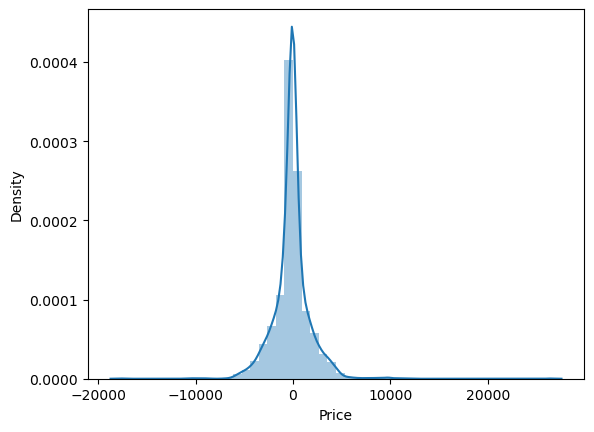

In [159]:
predict(RandomForestRegressor())


In [160]:
from sklearn.tree import DecisionTreeRegressor

Training score :0.9696998040730191
Predictions are :[16840.   4959.   8085.  ...  6755.  10141.  11652.5]


r2 score :0.6956602673123868
MAE : 1382.1709018718093
MSE : 5844455.091638936
RMSE:2417.530784010606
MAPE: 15.369031620907755


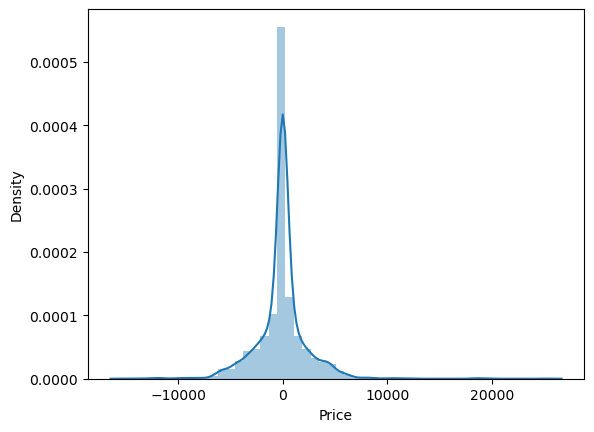

In [161]:
# Create and train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Now use your predict function
predict(model)

Training score :0.9696998040730191
Predictions are :[16840.   4959.   8085.  ...  6442.  10141.  11652.5]


r2 score :0.695804436944581
MAE : 1388.3616751748912
MSE : 5841686.498351769
RMSE:2416.9581085223153
MAPE: 15.45471483213918


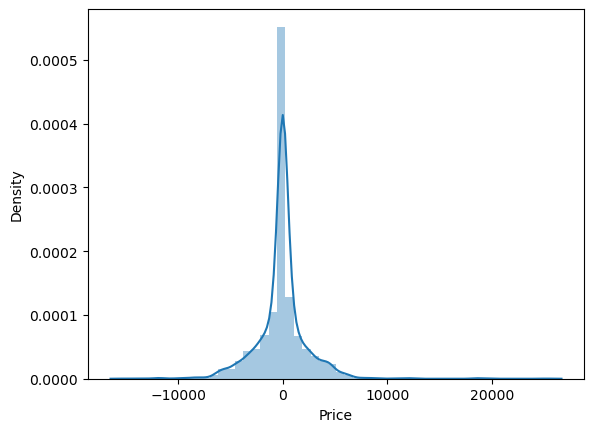

In [162]:
predict(DecisionTreeRegressor())

In [163]:
from sklearn.model_selection import RandomizedSearchCV

In [164]:
reg_rf = RandomForestRegressor()

In [165]:
np.linspace(start = 100, stop = 1200 , num =6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [166]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200 , num =6)]
max_features = ["auto" , "sqrt"]
max_depth = [int(x) for x in np.linspace(start = 100, stop = 1200 , num =6)]
min_samples_split = [5,10,15,100]

In [167]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features':max_features,
    'max_depth':max_depth ,
    'min_samples_split' :min_samples_split
    
}

In [168]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [100, 320, 540, 760, 980, 1200],
 'min_samples_split': [5, 10, 15, 100]}

In [169]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [170]:
rf_random.fit(X_train, y_train)#call fit function

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [100, 320, 540, 760, 980,
                                                      1200],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [171]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 320}

In [172]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=320, max_features='sqrt', min_samples_split=5,
                      n_estimators=980)

In [173]:
rf_random.best_score_

0.7991362339669751